In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import seaborn as sns
sns.set(style="whitegrid")

# Import Data

In [3]:
uni = pd.read_csv('week1.unique.csv')
uni.shape

(22293, 13)

In [4]:
uni['profit']=(uni['unit_price']-uni['unit_cost'])*uni['quant']

In [5]:
uni.head(10)

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,unit_price,profit
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59,199,560
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49,149,100
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49,89,80
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49,59,10
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9,22,39
5,28,武汉,线上,Female,35-39,Weekend,T恤,1,97.0,1,1,49,97,48
6,649,杭州,线下,Female,25-29,Weekend,短裤,1,33.0,1,1,19,33,14
7,520,杭州,线下,Male,>=60,Weekend,T恤,2,158.0,2,2,49,79,60
8,649,杭州,线下,Female,30-34,Weekend,牛仔裤,3,157.0,3,3,69,52,-51
9,21,北京,线下,Female,45-49,Weekend,毛衣,1,199.0,1,1,99,199,100


# EDA

In [6]:
uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22293 entries, 0 to 22292
Data columns (total 14 columns):
store_id        22293 non-null int64
city            22293 non-null object
channel         22293 non-null object
gender_group    22293 non-null object
age_group       22293 non-null object
wkd_ind         22293 non-null object
product         22293 non-null object
customer        22293 non-null int64
revenue         22293 non-null float64
order           22293 non-null int64
quant           22293 non-null int64
unit_cost       22293 non-null int64
unit_price      22293 non-null int64
profit          22293 non-null int64
dtypes: float64(1), int64(7), object(6)
memory usage: 2.4+ MB


In [8]:
uni_clean=uni.copy()

In [9]:
# change store_id to string
uni_clean['store_id'] = uni_clean['store_id'].apply(str)

In [10]:
uni_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22293 entries, 0 to 22292
Data columns (total 14 columns):
store_id        22293 non-null object
city            22293 non-null object
channel         22293 non-null object
gender_group    22293 non-null object
age_group       22293 non-null object
wkd_ind         22293 non-null object
product         22293 non-null object
customer        22293 non-null int64
revenue         22293 non-null float64
order           22293 non-null int64
quant           22293 non-null int64
unit_cost       22293 non-null int64
unit_price      22293 non-null int64
profit          22293 non-null int64
dtypes: float64(1), int64(6), object(7)
memory usage: 2.4+ MB


In [14]:
uni_clean.describe(include="all")

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,unit_price,profit,uni_quant_of_order,uni_revenue_of_customer
count,22293,22293,22293,22293,22293,22293,22293,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000
unique,64,10,2,3,11,2,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,207,深圳,线下,Female,30-34,Weekday,T恤,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,610,4364,18403,14208,4426,12465,10610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.629480,159.531371,1.651998,1.858072,46.124658,84.279998,74.935989,1.114494,93.250375
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.785605,276.254066,1.861480,2.347301,19.124347,46.314296,179.894501,0.443998,76.634966
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.660000,1.000000,1.000000,9.000000,0.000000,-650.000000,1.000000,-0.660000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,64.000000,1.000000,1.000000,49.000000,56.000000,18.000000,1.000000,59.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,99.000000,1.000000,1.000000,49.000000,79.000000,42.000000,1.000000,79.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,175.000000,2.000000,2.000000,49.000000,99.000000,87.000000,1.000000,99.000000


In [15]:
#drop records with revenue <0
drop_idx = uni_clean[uni_clean['revenue']<0].index
uni_clean = uni_clean.drop(drop_idx)

In [16]:
uni_clean.describe(include='all')

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,unit_price,profit,uni_quant_of_order,uni_revenue_of_customer
count,22292,22292,22292,22292,22292,22292,22292,22292.000000,22292.000000,22292.000000,22292.000000,22292.000000,22292.000000,22292.000000,22292.000000,22292.000000
unique,64,10,2,3,11,2,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,207,深圳,线下,Female,30-34,Weekday,T恤,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,610,4364,18403,14207,4426,12464,10610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.629508,159.538557,1.652028,1.858066,46.124529,84.283779,74.943747,1.114455,93.254588
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.785640,276.258179,1.861517,2.347353,19.124766,46.311894,179.894807,0.443968,76.634104
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,1.000000,9.000000,0.000000,-650.000000,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,64.000000,1.000000,1.000000,49.000000,56.000000,18.000000,1.000000,59.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,99.000000,1.000000,1.000000,49.000000,79.000000,42.000000,1.000000,79.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,175.000000,2.000000,2.000000,49.000000,99.000000,87.000000,1.000000,99.000000


# 问题一：整体销售情况随着时间的变化是怎样的？
· 选择什么变量？
    
    wkd_ind, revenue, profit, uni_quant_of_order, uni_revenue_of_customer
    channel, gender_group

· 呈现怎样的数据关系？
    
    比较周中/周末不同的销售情况。从渠道、性别、销售额、利润、顾客数量、单笔订单产品数量及人均消费额等维度分析

· 选择怎样的图表？
    
    柱状图


# A. 不同渠道周中/周末的销售额，利润，单笔订单产品数量，人均消费额分析 

In [17]:
#加一列单笔订单产品数量, 人均消费额
uni_clean['uni_quant_of_order'] = uni_clean['quant']/uni_clean['order']
uni_clean['uni_revenue_of_customer'] = uni_clean['revenue']/uni_clean['customer']

In [21]:
#用groupby分析不同渠道周中/周末的销售额，利润，单笔订单产品数量, 人均消费额
uni_wkd=uni_clean.groupby(['channel','wkd_ind']).agg({'revenue':np.sum, 'profit': np.sum, 'uni_quant_of_order':np.mean, 'uni_revenue_of_customer':np.mean}).reset_index()
uni_wkd

,channel,wkd_ind,revenue,profit,uni_quant_of_order,uni_revenue_of_customer
0,线上,Weekday,395302.56,189110,1.108044,92.739192
1,线上,Weekend,257868.58,127754,1.109055,93.502841
2,线下,Weekday,1698646.08,786041,1.122747,93.686322
3,线下,Weekend,1204616.29,567741,1.106883,92.801170


Weekday 有五天，Weekend只有两天，不能直接比较销售额和利润，故加一列日均销售额和一列日均利润


# Question: Why this is wrong? -- Solved
uni_wkd['revenue_per_day'] = uni_wkd['wkd_ind'].apply(lambda x: uni_wkd['revenue']/5 if x=='Weekday' else uni_wkd['revenue']/2)

In [25]:
#x作为变量是要参与到lambda的运算中的，此外，还需要加入axis=1
uni_wkd['revenue_per_day'] = uni_wkd.apply(lambda x: x['revenue']/5 if x['wkd_ind']=='Weekday' else x['revenue']/2, axis=1)
uni_wkd['profit_per_day'] = uni_wkd.apply(lambda x: x['profit']/5 if x['wkd_ind']=='Weekday' else x['profit']/2, axis=1)
uni_wkd

,channel,wkd_ind,revenue,profit,uni_quant_of_order,uni_revenue_of_customer,revenue_per_day,profit_per_day
0,线上,Weekday,395302.56,189110,1.108044,92.739192,79060.512,37822.0
1,线上,Weekend,257868.58,127754,1.109055,93.502841,128934.290,63877.0
2,线下,Weekday,1698646.08,786041,1.122747,93.686322,339729.216,157208.2
3,线下,Weekend,1204616.29,567741,1.106883,92.801170,602308.145,283870.5


In [50]:
#method 2
uni_wkd.loc[uni_wkd['wkd_ind'] =='Weekday', 'revenue_per_day'] = uni_wkd['revenue']/5
uni_wkd.loc[uni_wkd['wkd_ind'] =='Weekend', 'revenue_per_day'] = uni_wkd['revenue']/2

uni_wkd.loc[uni_wkd['wkd_ind'] =='Weekday', 'profit_per_day'] = uni_wkd['profit']/5
uni_wkd.loc[uni_wkd['wkd_ind'] =='Weekend', 'profit_per_day'] = uni_wkd['profit']/2

uni_wkd

,channel,wkd_ind,revenue,profit,uni_quant_of_order,uni_revenue_of_customer,revenue_per_day,profit_per_day
0,线上,Weekday,395302.56,189110,1.108044,92.739192,79060.512,37822.0
1,线上,Weekend,257868.58,127754,1.109055,93.502841,128934.290,63877.0
2,线下,Weekday,1698646.08,786041,1.122747,93.686322,339729.216,157208.2
3,线下,Weekend,1204616.29,567741,1.106883,92.801170,602308.145,283870.5


# 可视化

In [51]:
#windows
plt.rcParams['font.sans-serif'] = ['simhei']

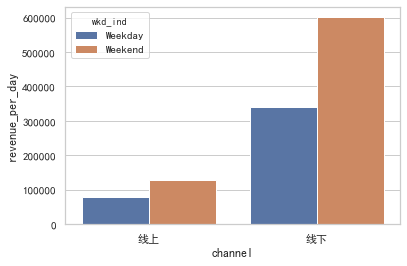

In [57]:
# 不同渠道周中/周末的日均销售额对比
sns.barplot(x = 'channel', y = 'revenue_per_day', hue = 'wkd_ind', data = uni_wkd)

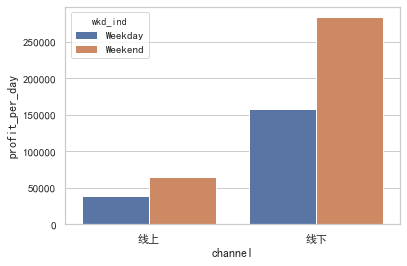

In [53]:
# 不同渠道周中/周末的日均利润对比
sns.barplot(x = 'channel', y = 'profit_per_day', hue = 'wkd_ind', data = uni_wkd)

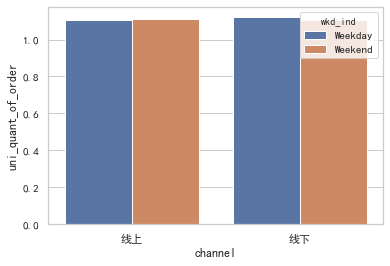

In [54]:
# 不同渠道周中/周末的单笔订单产品数量对比
sns.barplot(x = 'channel', y = 'uni_quant_of_order', hue = 'wkd_ind', data = uni_wkd)

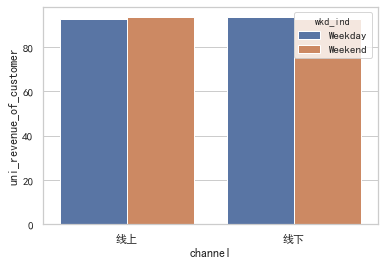

In [55]:
# 不同渠道周中/周末的人均消费额对比
sns.barplot(x = 'channel', y = 'uni_revenue_of_customer', hue = 'wkd_ind', data = uni_wkd)

# 结论：
1. 线下日均销售额及利润远高于线上
2. 线下：周末日均销售额和利润几乎是周中的两倍
3. 但单笔订单产品数量和人均消费额没有太大差别 （还挺奇怪的，居然没差别，这个数据是真实数据吗？）

# B. 不同性别周中/周末的销售额，利润，顾客数量，人均消费额分析 

In [67]:
#用groupby分析不同性别周中/周末的销售额，利润，顾客数量, 人均消费额
uni_gen=uni_clean.groupby(['gender_group','wkd_ind']).agg({'revenue':np.sum, 'profit': np.sum, 'customer':np.sum, 'uni_revenue_of_customer':np.mean}).reset_index()
uni_gen

,gender_group,wkd_ind,revenue,profit,customer,uni_revenue_of_customer
0,Female,Weekday,1541781.47,725916,15278,95.322304
1,Female,Weekend,985978.53,474065,9884,93.745690
2,Male,Weekday,545806.31,246549,5961,90.266569
3,Male,Weekend,472764.34,219686,5077,91.730576
4,Unkown,Weekday,6360.86,2686,79,79.708704
5,Unkown,Weekend,3742.00,1744,46,81.347826


In [74]:
uni_gen.loc[uni_gen['wkd_ind'] =='Weekday', 'revenue_per_day'] = uni_gen['revenue']/5
uni_gen.loc[uni_gen['wkd_ind'] =='Weekend', 'revenue_per_day'] = uni_gen['revenue']/2

uni_gen.loc[uni_gen['wkd_ind'] =='Weekday', 'profit_per_day'] = uni_gen['profit']/5
uni_gen.loc[uni_gen['wkd_ind'] =='Weekend', 'profit_per_day'] = uni_gen['profit']/2

uni_gen.loc[uni_gen['wkd_ind'] =='Weekday', 'customer_per_day'] = uni_gen['customer']/5
uni_gen.loc[uni_gen['wkd_ind'] =='Weekend', 'customer_per_day'] = uni_gen['customer']/2

uni_gen

,gender_group,wkd_ind,revenue,profit,customer,uni_revenue_of_customer,revenue_per_day,profit_per_day,customer_per_day
0,Female,Weekday,1541781.47,725916,15278,95.322304,308356.294,145183.2,3055.6
1,Female,Weekend,985978.53,474065,9884,93.745690,492989.265,237032.5,4942.0
2,Male,Weekday,545806.31,246549,5961,90.266569,109161.262,49309.8,1192.2
3,Male,Weekend,472764.34,219686,5077,91.730576,236382.170,109843.0,2538.5
4,Unkown,Weekday,6360.86,2686,79,79.708704,1272.172,537.2,15.8
5,Unkown,Weekend,3742.00,1744,46,81.347826,1871.000,872.0,23.0


# 可视化

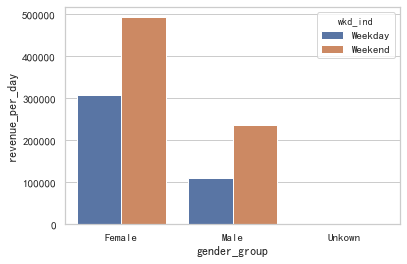

In [75]:
# 不同性别周中/周末的日均销售额对比
sns.barplot(x = 'gender_group', y = 'revenue_per_day', hue = 'wkd_ind', data = uni_gen)

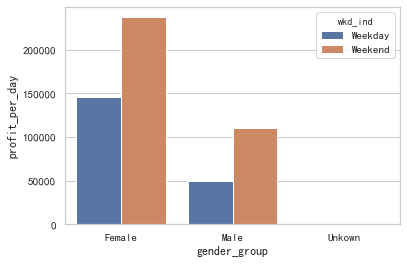

In [76]:
# 不同性别周中/周末的日均利润对比
sns.barplot(x = 'gender_group', y = 'profit_per_day', hue = 'wkd_ind', data = uni_gen)

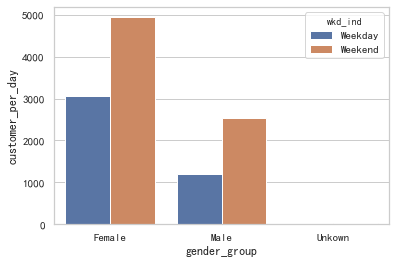

In [77]:
# 不同性别周中/周末的顾客数量对比
sns.barplot(x = 'gender_group', y = 'customer_per_day', hue = 'wkd_ind', data = uni_gen)

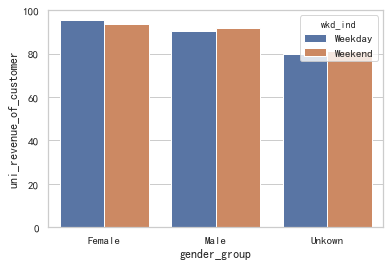

In [72]:
# 不同性别周中/周末的人均消费额对比
sns.barplot(x = 'gender_group', y = 'uni_revenue_of_customer', hue = 'wkd_ind', data = uni_gen)

# 结论：
1. 女性顾客带来的日均销售额及利润远高于男性顾客
2. 对于男性顾客：周末日均销售额和利润超过周中的两倍
3. 不论顾客性别是男是女，周末的顾客数量都远高于周中，但人均消费额周末/周中没有太大差别


# 问题二：不同产品的销售情况是怎样的？
· 选择什么变量？

    revenue, profit, quant
    product

· 呈现怎样的数据关系？
    
    1. 比较不同产品的销售情况。从销售额、利润、销量等维度分析。
    2. 亏损的产品销售分析

· 选择怎样的图表？
    
    柱状图，饼图


# 1. 比较不同产品的销售情况。从销售额、利润、销量等维度分析。

In [123]:
uni_product=uni_clean.groupby(['product']).agg({'revenue':np.sum, 'profit': np.sum, 'quant':np.sum}).reset_index().sort_values('revenue',ascending=False)
uni_product

,product,revenue,profit,quant
0,T恤,1538744.84,636130,18425
1,当季新品,590664.88,275915,5338
8,配件,444685.15,310695,4622
3,牛仔裤,246127.48,78328,2432
2,毛衣,245630.80,111427,1356
6,裙子,137302.78,78617,995
5,袜子,127731.36,95154,3639
7,运动,118060.34,30299,1792
4,短裤,107485.88,54081,2821


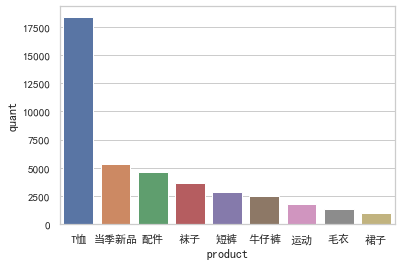

In [124]:
#不同产品销量分析
result = uni_clean.groupby(["product"])['quant'].agg(np.sum).reset_index().sort_values('quant',ascending=False)
sns.barplot(x = 'product', y = 'quant', data = uni_product, order=result['product'])

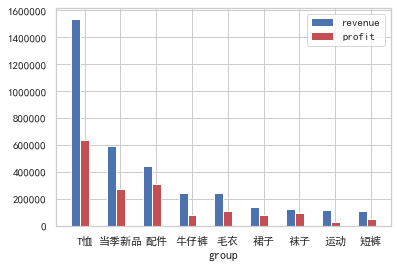

In [125]:
#不同产品销售额及利润分析
# set width of bar
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(uni_product['revenue']))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, uni_product['revenue'], color='b', width=barWidth, edgecolor='white', label='revenue')
plt.bar(r2, uni_product['profit'], color='r', width=barWidth, edgecolor='white', label='profit')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(uni_product['revenue']))], uni_product['product'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


# 结论：
从销量，销售额，利润额来看，T恤的表现远超其他产品，当季新品和配件随其后。

In [120]:
#单独取出T恤的数据
uni_t_gender = uni_clean[uni_clean['product']=='T恤'].groupby(['product','gender_group'])['quant'].sum().reset_index()
uni_t_gender

,product,gender_group,quant
0,T恤,Female,13109
1,T恤,Male,5253
2,T恤,Unkown,63


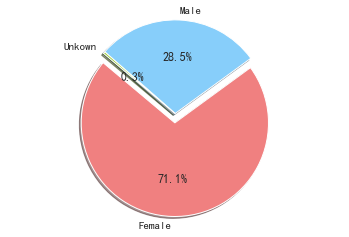

In [121]:
# T恤销量男女比
colors = ['lightcoral', 'lightskyblue', 'yellowgreen']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(uni_t_gender['quant'], explode=explode, labels=uni_t_gender['gender_group'], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# 结论：
T恤销量七成来自女性顾客。

# 2. 亏损产品销售分析

In [183]:
plt.rcParams['axes.unicode_minus']=False

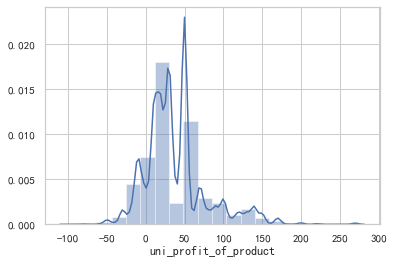

In [195]:
uni_clean['uni_profit_of_product'] = uni_clean['profit']/uni_clean['quant']
sns.distplot(uni_clean['uni_profit_of_product'], bins=20)

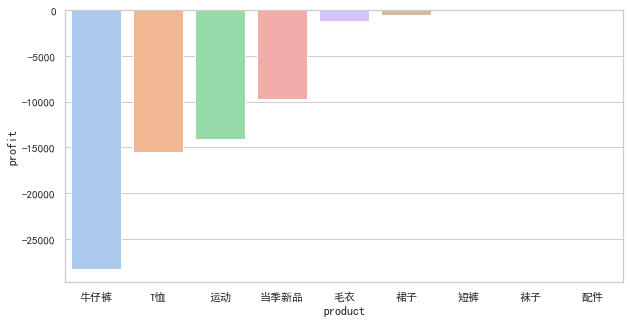

In [219]:
uni_loss = uni_clean[uni_clean['uni_profit_of_product']<0]
sort = uni_loss.groupby(["product"])['profit'].agg(np.sum).reset_index().sort_values('profit')
plt.figure(figsize=(10,5))
sns.barplot(x = 'product', y = 'profit',data = sort, order=sort['product'],palette="pastel")

In [229]:
#取出亏损牛仔裤的数据， groupby gender
uni_jean = uni_clean[(uni_clean['product']=='牛仔裤') & (uni_clean['profit']<0) ].groupby(['gender_group'])['profit'].sum().reset_index()
uni_jean

,gender_group,profit
0,Female,-22975
1,Male,-5137
2,Unkown,-180


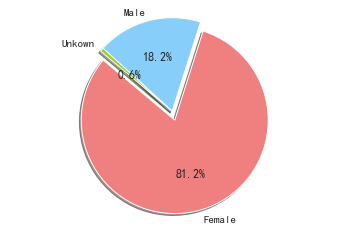

In [235]:
# 亏损牛仔裤销售额男女比
colors = ['lightcoral', 'lightskyblue', 'yellowgreen']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(-1*uni_jean['profit'], explode=explode, labels=uni_jean['gender_group'], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# 结论：
亏损最多的产品是牛仔裤；T恤，运动和当季新品随其后。亏损牛仔裤销售额八成来自女性顾客。

# 问题三：顾客偏爱那种购买方式？
· 选择什么变量？

    gender_group, age_group, city
    channel

· 呈现怎样的数据关系？
    
    比较不同性别，年龄，城市的顾客喜爱线上/线下购买方式。

· 选择怎样的图表？
    
    柱状图


seaborn color palette:
https://seaborn.pydata.org/tutorial/color_palettes.html

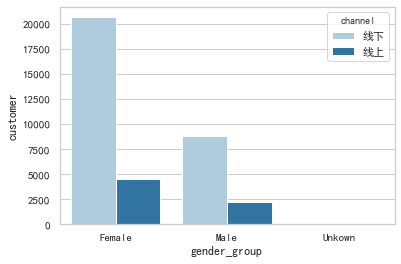

In [161]:
uni_channel_gender = uni_clean.groupby(['gender_group','channel'])['customer'].sum().reset_index().sort_values('customer',ascending=False)
uni_channel_gender
sns.barplot(x='gender_group',y='customer',hue='channel',data=uni_channel_gender, palette="Paired")

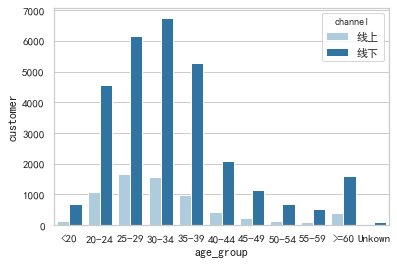

In [163]:
age_order = ['<20','20-24','25-29',  '30-34','35-39',  '40-44','45-49', '50-54','55-59','>=60', 'Unkown']
uni_channel_age = uni_clean.groupby(['age_group','channel'])['customer'].sum().reset_index()
uni_channel_age
sns.barplot(x='age_group',y='customer',hue='channel',data=uni_channel_age, order=age_order, palette="Paired")

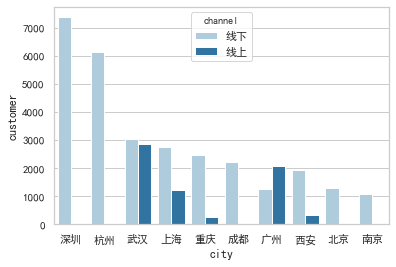

In [165]:
uni_channel_city = uni_clean.groupby(['city','channel'])['customer'].sum().reset_index().sort_values('customer',ascending=False)
uni_channel_city
sns.barplot(x='city',y='customer',hue='channel',data=uni_channel_city, palette="Paired")

# 结论：
1. 不同性别顾客都偏爱线下购买
2. 主要顾客集中在20-40岁，且都偏爱线下购买
3. 只有武汉，广州，上海，西安，重庆的顾客会线上购买。广州顾客更偏爱线上，武汉顾客无明显偏爱，其他城市顾客均偏爱线下购买。

# 问题四：销售额和产品成本之间的关系怎么样？
· 选择什么变量？

    revenue，cost

· 呈现怎样的数据关系？
    
    销售额于成本之间的相关关系。

· 选择怎样的图表？
    
    热力图/散点图


In [181]:
uni_clean['uni_revenue_of_product'] = uni_clean['revenue']/uni_clean['quant']
uni_clean['uni_profit_of_product'] = uni_clean['profit']/uni_clean['quant']
cor = uni_clean[['uni_revenue_of_product','uni_profit_of_product','unit_cost','unit_price']].corr()
cor

,uni_revenue_of_product,uni_profit_of_product,unit_cost,unit_price
uni_revenue_of_product,1.000000,0.911672,0.502248,0.999996
uni_profit_of_product,0.911672,1.000000,0.102566,0.911735
unit_cost,0.502248,0.102566,1.000000,0.502125
unit_price,0.999996,0.911735,0.502125,1.000000


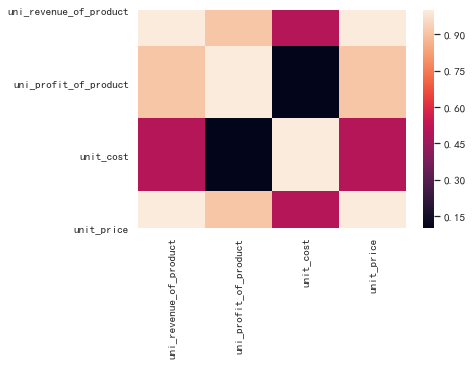

In [182]:
sns.heatmap(cor)

# 结论：
单位商品的销售额与成本之间是成正相关的，相关系数为0.5；单位商品的销售额与利润成强正相关，相关系数为0.91；商品的成本与利润的相关性很低，仅为0.1; 但商品的售价和利润相关性很高，相关系数为0.91.

# Question：怎么解释上面的系数呢？有什么业务建议呢？不太懂

# 总结：
1. 线下日均销售额及利润远高于线上，但单笔订单产品数量和人均消费额没有太大差别


2. 女性顾客带来的日均销售额及利润远高于男性顾客


3. 周末日均销售额和利润远超周中


4. 不论顾客性别是男是女，周末的顾客数量都远高于周中，但人均消费额周末/周中没有太大差别。
    
    可以尝试一些措施提高女性顾客的周末人均消费额（店铺成列/服饰搭配吸引周末逛街的女生）
    
    
5. 产品表现：

    销售最好的是T恤，七成销量来自女性顾客；亏损最多的是牛仔裤，八成亏损来自女性顾客。
    
    
6. 购买渠道偏好：
       
    主要顾客集中在20-40岁，且不论性别都偏爱线下购买
    
    只有武汉，广州，上海，西安，重庆的顾客会线上购买。广州顾客更偏爱线上，其他城市顾客均偏爱线下购买。可以针对广州，武汉采用不同的线上营销措施。